In [1]:
# Step 1 : Import Libraries
import pandas as pd
import numpy as n

In [2]:
# Import data set
df = pd.read_csv(r"C:\Users\manik\OneDrive\Desktop\Chinese\Titanic-Dataset.csv")
print(df.head())
print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [3]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
#Filling the missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

#  Drop 'Cabin' due to
df.drop(columns='Cabin',inplace=True)

#  Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Check to make sure all missing values are handled
print("Remaining missing values:\n",df.isnull().sum())

Remaining missing values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [5]:
# One-hot encoding for categorical columns
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# View the first few rows to confirm encoding
df.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True


In [6]:
# Drop columns that are not useful for prediction
df.drop(columns=['Name', 'Ticket'], inplace=True)

# Check the dataframe again
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [7]:
from sklearn.preprocessing import StandardScaler

# Standardizing Age and Fare columns
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Check the result
df[['Age', 'Fare']].describe()

,Age,Fare
count,8.910000e+02,8.910000e+02
mean,2.272780e-16,3.987333e-18
std,1.000562e+00,1.000562e+00
min,-2.224156e+00,-6.484217e-01
25%,-5.657365e-01,-4.891482e-01
50%,-1.046374e-01,-3.573909e-01
75%,4.333115e-01,-2.424635e-02
max,3.891554e+00,9.667167e+00


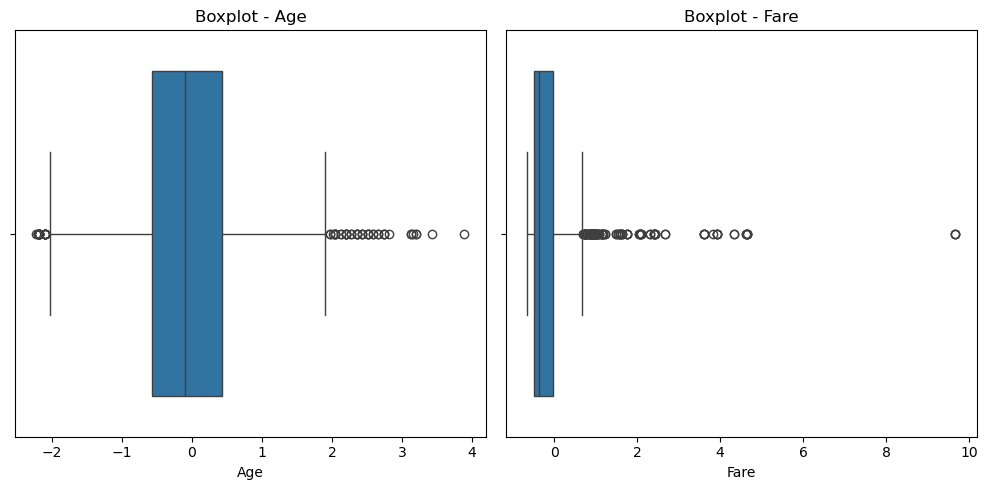

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title("Boxplot - Age")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title("Boxplot - Fare")

plt.tight_layout()
plt.show()


In [9]:
# IQR for Fare
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[(df['Fare'] >= Q1 - 1.5 * IQR) & (df['Fare'] <= Q3 + 1.5 * IQR)]

# Check the new shape
print("Data shape after outlier removal:", df.shape)


Data shape after outlier removal: (775, 10)
